# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
sinasc_raw['munResNome'].value_counts().shape

(53,)

In [4]:
#agrupando 2 categorias de latitude dos municípios em uma variável
lat_mun = pd.cut(sinasc_raw['munResLat'], [-13.5, -10.5, -8.7])
#montando um DataFrame para trabalhar com os dados e aplicar as operações
df_1 = sinasc_raw[['APGAR5', 'APGAR1']]
#aplicando as operações na utilização do pivot table
df_1.pivot_table(values=['APGAR5', 'APGAR1'],
index=lat_mun, 
aggfunc=['sum','mean','min','max','median','std','var']
) 


sum                mean              min           max  \
                  APGAR1    APGAR5    APGAR1    APGAR5 APGAR1 APGAR5 APGAR1   
munResLat                                                                     
(-13.5, -10.5]  104590.0  118393.0  8.070216  9.138788    0.0    0.0   10.0   
(-10.5, -8.7]   114559.0  128746.0  8.199771  9.216551    0.0    0.0   10.0   

                      median              std                 var            
               APGAR5 APGAR1 APGAR5    APGAR1    APGAR5    APGAR1    APGAR5  
munResLat                                                                    
(-13.5, -10.5]   10.0    8.0    9.0  0.960767  0.805381  0.923073  0.648638  
(-10.5, -8.7]    10.0    8.0    9.0  1.002839  0.774741  1.005686  0.600224

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [6]:
#vamos utilizar das variáveis "QTDFILVIVO" e "QTDFILMORT" no nosso novo DataFrame, que correspondem às quantidades de filhos vivos e filhos mortos respectivamente
df_2 = sinasc_raw[['QTDFILVIVO', 'QTDFILMORT']]
#agora agruparemos o nosso DataFrame por quartis da coluna de altitude dos municípios "munResAlt"
mun_alt = pd.qcut(sinasc_raw['munResAlt'],4)
pd.pivot_table(df_2, values=['QTDFILVIVO','QTDFILMORT'], 
index=mun_alt,
aggfunc=['sum','mean','min','max','median','std','var']
)


sum                  mean                   min  \
               QTDFILMORT QTDFILVIVO QTDFILMORT QTDFILVIVO QTDFILMORT   
munResAlt                                                               
(84.999, 87.0]     2282.0     8976.0   0.309550   1.177798        0.0   
(87.0, 153.0]      1238.0     5430.0   0.284860   1.189225        0.0   
(153.0, 191.0]     1585.0     6354.0   0.230949   0.922608        0.0   
(191.0, 595.0]     1538.0     6066.0   0.242281   0.950784        0.0   

                                 max                median             \
               QTDFILVIVO QTDFILMORT QTDFILVIVO QTDFILMORT QTDFILVIVO   
munResAlt                                                               
(84.999, 87.0]        0.0        9.0       12.0        0.0        1.0   
(87.0, 153.0]         0.0        9.0       14.0        0.0        1.0   
(153.0, 191.0]        0.0        5.0        9.0        0.0        1.0   
(191.0, 595.0]        0.0       28.0       30.0        0.0        1.0   

                      std                   var             
               QTDFILMORT QTDFILVIVO QTDFILMORT QTDFILVIVO  
munResAlt                                                   
(84.999, 87.0]   0.642375   1.236798   0.412645   1.529670  
(87.0, 153.0]    0.639574   1.319208   0.409055   1.740309  
(153.0, 191.0]   0.534301   1.041525   0.285477   1.084773  
(191.0, 595.0]   0.638724   1.079861   0.407968   1.166099

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [7]:
df_3 = sinasc_raw[['munResNome','IDADEMAE']]
df_3


,munResNome,IDADEMAE
0,Alta Floresta D'Oeste,19
1,Alta Floresta D'Oeste,29
2,Alta Floresta D'Oeste,37
3,Alto Alegre dos Parecis,30
4,Alta Floresta D'Oeste,30
...,...,...
27023,Vilhena,32
27024,Chupinguaia,19
27025,Vilhena,24
27026,Vilhena,21


In [8]:
mapping = {
'Candeias do Jamari':'Porto Velho',
'Guajará-Mirim':'Porto Velho',
'Itapuã do Oeste':'Porto Velho',
'Nova Mamoré':'Porto Velho',
'Porto Velho':'Porto Velho',
'Alto Paraíso':'Ariquemes',
'Ariquemes':'Ariquemes',
'Buritis':'Ariquemes',
'Cacaulândia':'Ariquemes',
'Campo Novo de Rondônia':'Ariquemes',
'Cujubim':'Ariquemes',
'Monte Negro':'Ariquemes',
'Rio Crespo':'Ariquemes',
'Governador Jorge Teixeira':'Jaru',
'Jaru':'Jaru',
"Machadinho D'Oeste":'Jaru',
'Theobroma':'Jaru',
'Vale do Anari':'Jaru',
"Alvorada D'Oeste":'Ji-Paraná',
'Costa Marques':'Ji-Paraná',
'Ji-Paraná':'Ji-Paraná',
'Mirante da Serra':'Ji-Paraná',
'Nova União':'Ji-Paraná',
'Ouro Preto do Oeste':'Ji-Paraná',
'Presidente Médici':'Ji-Paraná',
'São Francisco do Guaporé':'Ji-Paraná',
'São Miguel do Guaporé':'Ji-Paraná',
'Seringueiras':'Ji-Paraná',
'Teixeirópolis':'Ji-Paraná',
'Urupá':'Ji-Paraná',
'Vale do Paraíso':'Ji-Paraná',
"Alta Floresta D'Oeste":'Cacoal',
'Alto Alegre dos Parecis':'Cacoal',
'Cacoal':'Cacoal',
'Castanheiras':'Cacoal',
"Espigão D'Oeste":'Cacoal',
'Ministro Andreazza':'Cacoal',
"Nova Brasilândia D'Oeste":'Cacoal',
'Novo Horizonte do Oeste':'Cacoal',
'Parecis':'Cacoal',
'Pimenta Bueno':'Cacoal',
'Primavera de Rondônia':'Cacoal',
'Rolim de Moura':'Cacoal',
"Santa Luzia D'Oeste":'Cacoal',
"São Felipe D'Oeste":'Cacoal',
'Cabixi':'Vilhena',
'Cerejeiras':'Vilhena',
'Chupinguaia':'Vilhena',
'Colorado do Oeste':'Vilhena',
'Corumbiara':'Vilhena',
'Pimenteiras do Oeste':'Vilhena',
'Vilhena':'Vilhena',
'Município ignorado - RO':''
}

In [9]:
df_3.replace(mapping, inplace=True)

/tmp/ipykernel_3555/815721311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.replace(mapping, inplace=True)


In [10]:
ex_4 = pd.pivot_table(df_3,
values=['munResNome','IDADEMAE'],
index='munResNome',
aggfunc='mean'
)
ex_4

,IDADEMAE
munResNome,
,24.000000
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


In [11]:
#eliminando o dado do município desconhecido
ex_4 = ex_4.iloc[1:,:]
ex_4

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


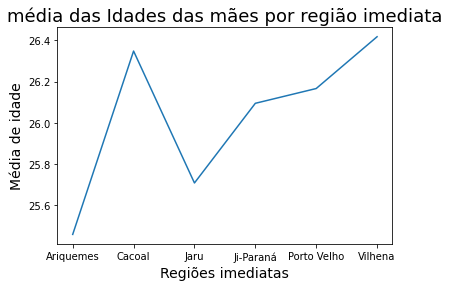

In [12]:
plt.title('média das Idades das mães por região imediata', fontsize=18)
plt.xlabel('Regiões imediatas',fontsize=14)
plt.ylabel('Média de idade',fontsize=14)
plt.plot(ex_4.index,ex_4['IDADEMAE'])

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [13]:
df_4 = sinasc_raw[['munResNome','IDADEMAE']]
df_4

,munResNome,IDADEMAE
0,Alta Floresta D'Oeste,19
1,Alta Floresta D'Oeste,29
2,Alta Floresta D'Oeste,37
3,Alto Alegre dos Parecis,30
4,Alta Floresta D'Oeste,30
...,...,...
27023,Vilhena,32
27024,Chupinguaia,19
27025,Vilhena,24
27026,Vilhena,21


In [14]:
mapping = {
    'Porto Velho':'IDH-M ALTO',
    'Vilhena':'IDH-M ALTO',
    'Cacoal':'IDH-M ALTO',
    'Ji-Paraná':'IDH-M ALTO',
    'Pimenta Bueno':'IDH-M ALTO',
    'Ariquemes':'IDH-M ALTO',
    'Rolim de Moura':'IDH-M ALTO',
    'Cerejeiras':'IDH-M MÉDIO',
    'Jaru':'IDH-M MÉDIO',
    'Colorado do Oeste':'IDH-M MÉDIO',
    'Ouro Preto do Oeste':'IDH-M MÉDIO',
    "Espigão D'Oeste":'IDH-M MÉDIO',
    "Santa Luzia D'Oeste":'IDH-M MÉDIO',
    'Pimenteiras do Oeste':'IDH-M MÉDIO',
    'Presidente Médici':'IDH-M MÉDIO',
    'Castanheiras':'IDH-M MÉDIO',
    'Guajará-Mirim':'IDH-M MÉDIO',
    'Chupinguaia':'IDH-M MÉDIO',
    'Cabixi':'IDH-M MÉDIO',
    'Candeias do Jamari':'IDH-M MÉDIO',
    "São Felipe D'Oeste":'IDH-M MÉDIO',
    'Cacaulândia':'IDH-M MÉDIO',
    'São Miguel do Guaporé':'IDH-M MÉDIO',
    'Mirante da Serra':'IDH-M MÉDIO',
    "Alvorada D'Oeste":'IDH-M MÉDIO',
    'Teixeirópolis':'IDH-M MÉDIO',
    "Nova Brasilândia D'Oeste":'IDH-M MÉDIO',
    'Rio Crespo':'IDH-M MÉDIO',
    'Primavera de Rondônia':'IDH-M MÉDIO',
    "Alta Floresta D'Oeste":'IDH-M MÉDIO',
    'Ministro Andreazza':'IDH-M MÉDIO',
    'Novo Horizonte do Oeste':'IDH-M MÉDIO',
    'Vale do Paraíso':'IDH-M MÉDIO',
    'Alto Paraíso':'IDH-M MÉDIO',
    'Parecis':'IDH-M MÉDIO',
    'Buritis':'IDH-M MÉDIO',
    'Itapuã do Oeste':'IDH-M MÉDIO',
    'Corumbiara':'IDH-M MÉDIO',
    'Cujubim':'IDH-M MÉDIO',
    'Costa Marques':'IDH-M MÉDIO',
    'São Francisco do Guaporé':'IDH-M MÉDIO',
    'Urupá':'IDH-M MÉDIO',
    'Monte Negro':'IDH-M MÉDIO',
    'Seringueiras':'IDH-M BAIXO',
    'Governador Jorge Teixeira':'IDH-M BAIXO',
    "Machadinho D'Oeste":'IDH-M BAIXO',
    'Campo Novo de Rondônia':'IDH-M BAIXO',
    'Alto Alegre dos Parecis':'IDH-M BAIXO',
    'Theobroma':'IDH-M BAIXO',
    'Nova União':'IDH-M BAIXO',
    'Nova Mamoré':'IDH-M BAIXO',
    'Vale do Anari':'IDH-M BAIXO',
    'Município ignorado - RO':''
}

In [15]:
df_4.replace(mapping, inplace=True)
df_4


/tmp/ipykernel_3555/823178425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4.replace(mapping, inplace=True)


,munResNome,IDADEMAE
0,IDH-M MÉDIO,19
1,IDH-M MÉDIO,29
2,IDH-M MÉDIO,37
3,IDH-M BAIXO,30
4,IDH-M MÉDIO,30
...,...,...
27023,IDH-M ALTO,32
27024,IDH-M MÉDIO,19
27025,IDH-M ALTO,24
27026,IDH-M ALTO,21


In [16]:
ex_5_1 = df_4.pivot_table(values=['munResNome','IDADEMAE'],
index='munResNome',
aggfunc='mean'
)
ex_5_1 = ex_5_1.iloc[1:,:]

In [17]:
ex_5_1['IDADEMAE']

munResNome
IDH-M ALTO     26.280332
IDH-M BAIXO    25.326944
IDH-M MÉDIO    25.884855
Name: IDADEMAE, dtype: float64

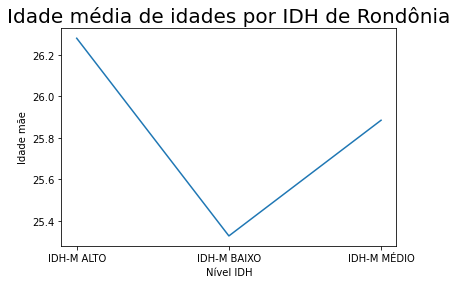

In [18]:
plt.title('Idade média de idades por IDH de Rondônia',fontsize=20)
plt.xlabel('Nível IDH')
plt.ylabel('Idade mãe')
plt.plot(ex_5_1.index,ex_5_1['IDADEMAE'])

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [19]:
df_5 = sinasc_raw[['munResNome','IDADEMAE']]
df_5.head()

,munResNome,IDADEMAE
0,Alta Floresta D'Oeste,19
1,Alta Floresta D'Oeste,29
2,Alta Floresta D'Oeste,37
3,Alto Alegre dos Parecis,30
4,Alta Floresta D'Oeste,30


In [20]:
mapping = {
    'Porto Velho':'Desenvolvimento Moderado',
    'Vilhena':'Desenvolvimento Moderado',
    'Cacoal':'Desenvolvimento Moderado',
    'Ji-Paraná':'Desenvolvimento Moderado',
    'Pimenta Bueno':'Desenvolvimento Moderado',
    'Ariquemes':'Desenvolvimento Moderado',
    'Rolim de Moura':'Desenvolvimento Moderado',
    'Cerejeiras':'Desenvolvimento Moderado',
    'Jaru':'Desenvolvimento Moderado',
    'Colorado do Oeste':'Desenvolvimento Moderado',
    'Ouro Preto do Oeste':'Desenvolvimento Moderado',
    "Santa Luzia D'Oeste":'Desenvolvimento Moderado',
    'Pimenteiras do Oeste':'Desenvolvimento Moderado',
    'Chupinguaia':'Desenvolvimento Moderado',
    'Teixeirópolis':'Desenvolvimento Moderado',
    'Rio Crespo':'Desenvolvimento Moderado',
    'Urupá':'Desenvolvimento Moderado',
    "Alta Floresta D'Oeste":'Desenvolvimento Moderado',
    'Buritis':'Desenvolvimento Moderado',
    'Monte Negro':'Desenvolvimento Moderado',
    'São Francisco do Guaporé':'Desenvolvimento Moderado',
    'Presidente Médici':'Desenvolvimento Moderado',
    "São Felipe D'Oeste":'Desenvolvimento Moderado',
    'Primavera de Rondônia':'Desenvolvimento Moderado',
    'São Miguel do Guaporé':'Desenvolvimento Moderado',
    "Espigão D'Oeste":'Desenvolvimento Regular',
    'Cabixi':'Desenvolvimento Regular',
    'Parecis':'Desenvolvimento Regular',
    'Novo Horizonte do Oeste':'Desenvolvimento Regular',
    "Machadinho D'Oeste":'Desenvolvimento Regular',
    'Alto Alegre dos Parecis':'Desenvolvimento Regular',
    'Nova Mamoré':'Desenvolvimento Regular',
    'Nova União':'Desenvolvimento Regular',
    'Seringueiras':'Desenvolvimento Regular',
    'Cacaulândia':'Desenvolvimento Regular',
    'Cujubim':'Desenvolvimento Regular',
    'Mirante da Serra':'Desenvolvimento Regular',
    "Alvorada D'Oeste":'Desenvolvimento Regular',
    'Governador Jorge Teixeira':'Desenvolvimento Regular',
    'Campo Novo de Rondônia':'Desenvolvimento Regular',
    'Vale do Anari':'Desenvolvimento Regular',
    'Costa Marques':'Desenvolvimento Regular',
    'Itapuã do Oeste':'Desenvolvimento Regular',
    'Ministro Andreazza':'Desenvolvimento Regular',
    'Vale do Paraíso':'Desenvolvimento Regular',
    'Guajará-Mirim':'Desenvolvimento Regular',
    "Nova Brasilândia D'Oeste":'Desenvolvimento Regular',
    'Alto Paraíso':'Desenvolvimento Regular',
    'Corumbiara':'Desenvolvimento Regular',
    'Castanheiras':'Desenvolvimento Regular',
    'Candeias do Jamari':'Desenvolvimento Regular',
    'Theobroma':'Desenvolvimento Regular',
    'Município ignorado - RO':''
}

In [21]:
df_5.replace(mapping, inplace=True)

/tmp/ipykernel_3555/66304364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5.replace(mapping, inplace=True)


In [22]:
ex_5_2 = df_5.pivot_table(values=['munResNome','IDADEMAE'],
index='munResNome',
aggfunc='mean'
)

In [23]:
ex_5_2 = ex_5_2.iloc[1:,:]
ex_5_2

,IDADEMAE
munResNome,
Desenvolvimento Moderado,26.238419
Desenvolvimento Regular,25.516980


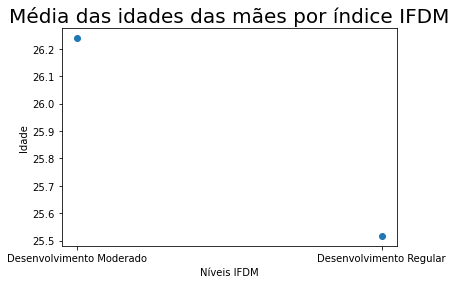

In [24]:
plt.title('Média das idades das mães por índice IFDM',fontsize=20)
plt.xlabel('Níveis IFDM')
plt.ylabel('Idade')
plt.scatter(ex_5_2.index,ex_5_2['IDADEMAE'])

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [26]:
df_6 = sinasc_raw[['munResNome','IDADEMAE']]
df_6

,munResNome,IDADEMAE
0,Alta Floresta D'Oeste,19
1,Alta Floresta D'Oeste,29
2,Alta Floresta D'Oeste,37
3,Alto Alegre dos Parecis,30
4,Alta Floresta D'Oeste,30
...,...,...
27023,Vilhena,32
27024,Chupinguaia,19
27025,Vilhena,24
27026,Vilhena,21


In [54]:
mapping = {
    'Porto Velho':'Acima de 1 Bilhão',
    'Ji-Paraná':'Acima de 1 Bilhão',
    'Vilhena':'Acima de 1 Bilhão',
    'Ariquemes':'Acima de 1 Bilhão',
    'Cacoal':'Acima de 1 Bilhão',
    'Jaru':'Acima de 1 Bilhão',
    'Rolim de Moura':'Acima de 1 Bilhão',
    'Pimenta Bueno':'Acima de 1 Bilhão',
    'Guajará-Mirim':'Acima de 500 Milhões',
    'Ouro Preto do Oeste':'Acima de 500 Milhões',
    'Buritis':'Acima de 500 Milhões',
    "Machadinho D'Oeste":'Acima de 500 Milhões',
    "Espigão D'Oeste":'Acima de 500 Milhões',
    'São Miguel do Guaporé':'Acima de 500 Milhões',
    'Candeias do Jamari':'Acima de 500 Milhões',
    'Nova Mamoré':'Acima de 500 Milhões',
    'Cerejeiras':'Acima de 500 Milhões',
    "Alta Floresta D'Oeste":'Acima de 300 Milhões',
    'Presidente Médici':'Acima de 300 Milhões',
    'Cujubim':'Acima de 300 Milhões',
    "Nova Brasilândia D'Oeste":'Acima de 300 Milhões',
    'Alto Paraíso':'Acima de 300 Milhões',
    'São Francisco do Guaporé':'Acima de 300 Milhões',
    'Colorado do Oeste':'Acima de 300 Milhões',
    'Monte Negro':'Acima de 200 Milhões',
    'Alto Alegre dos Parecis':'Acima de 200 Milhões',
    'Campo Novo de Rondônia':'Acima de 200 Milhões',
    "Alvorada D'Oeste":'Acima de 200 Milhões',
    'Chupinguaia':'Acima de 100 Milhões',
    'Corumbiara':'Acima de 100 Milhões',
    'Ministro Andreazza':'Acima de 100 Milhões',
    'Urupá':'Acima de 100 Milhões',
    'Costa Marques':'Acima de 100 Milhões',
    'Seringueiras':'Acima de 100 Milhões',
    'Mirante da Serra':'Acima de 100 Milhões',
    'Governador Jorge Teixeira':'Acima de 100 Milhões',
    'Theobroma':'Acima de 100 Milhões',
    "Santa Luzia D'Oeste":'Acima de 100 Milhões',
    'Novo Horizonte do Oeste':'Acima de 100 Milhões',
    'Itapuã do Oeste':'Acima de 100 Milhões',
    'Vale do Paraíso':'Acima de 100 Milhões',
    'Cacaulândia':'Acima de 100 Milhões',
    'Cabixi':'Acima de 100 Milhões',
    'Vale do Anari':'Acima de 100 Milhões',
    'Nova União':'Até 100 Milhões',
    'Parecis':'Até 100 Milhões',
    'Rio Crespo':'Até 100 Milhões',
    'Pimenteiras do Oeste':'Até 100 Milhões',
    'Teixeirópolis':'Até 100 Milhões',
    "São Felipe D'Oeste":'Até 100 Milhões',
    'Castanheiras':'Até 100 Milhões',
    'Primavera de Rondônia':'Até 100 Milhões',
    'Município ignorado - RO':''
}

In [55]:
df_6.replace(mapping, inplace=True)


/tmp/ipykernel_3555/2374869682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6.replace(mapping, inplace=True)


In [56]:
ex_5_3 = df_6.pivot_table(values=['munResNome','IDADEMAE'],
index='munResNome',
aggfunc='mean'
)

In [58]:
ex_5_3 = ex_5_3.iloc[1:,:]

In [69]:
ex_5_3.index.names=['Faixas de PIB']
ex_5_3

,IDADEMAE
Faixas de PIB,
Acima de 1 Bilhão,26.265562
Acima de 100 Milhões,25.662910
Acima de 200 Milhões,25.323204
Acima de 300 Milhões,25.833511
Acima de 500 Milhões,25.782528
Até 100 Milhões,26.515081


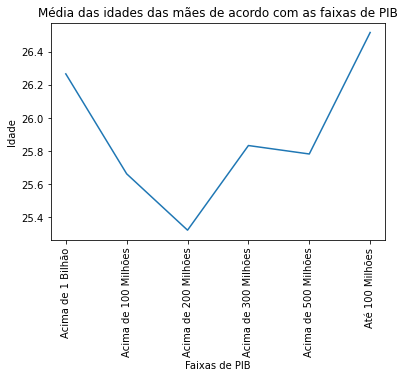

In [85]:
plt.title('Média das idades das mães de acordo com as faixas de PIB')
plt.xlabel('Faixas de PIB')
plt.ylabel('Idade')
plt.xticks(rotation=90)
plt.plot(ex_5_3.index,ex_5_3['IDADEMAE'])

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Analisando a média de idades das mães considerando todos os índices propostos, concluímos que apenas as análises dos índices de IDH e IFDM corroboram para a hipótese alternativa de que nas regiões mais desenvolvidas a média de idades das mães é maior que nas regiões menos desenvolvidas. O que difere ao analisarmos esta variável mediante ao PIB.